# Author: Yen An Chen

# Context

In this notebook, we will explore the dataset and perform some basic cleaning. We will also create a new column for sentiment labels based on the score. The cleaned data can be then used to train the models in the following of this project.

In [1]:
import pandas as pd
import os

In [2]:
csv_path = '../data/reviews.csv'

In [3]:
chunk_iter = pd.read_csv(csv_path, chunksize=100_000)  # 每次讀10萬筆
first_chunk = next(chunk_iter)

# 看欄位名稱
print("欄位名稱：")
print(first_chunk.columns)

# 預覽前幾筆資料
first_chunk.head(50)

欄位名稱：
Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score'],
      dtype='object')


,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
5,125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91
6,125646,yummybeer,2017-12-19,,4.75,4.50,4.75,4.75,4.75,4.69
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
8,125646,wwoj,2017-12-16,,5.00,4.75,4.50,4.50,4.50,4.59
9,125646,Rubenjr,2017-12-14,,4.75,4.50,4.50,4.75,4.50,4.54


In [4]:
first_chunk.describe()

,beer_id,look,smell,taste,feel,overall,score
count,100000.000000,61355.000000,61355.000000,61355.000000,61355.000000,61355.000000,100000.000000
mean,111405.417700,4.034089,3.997360,4.009848,3.976489,3.997857,3.952688
std,74972.856678,0.509475,0.557726,0.590384,0.559437,0.560009,0.566111
min,47604.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,55186.000000,3.750000,3.750000,3.750000,3.750000,3.750000,3.680000
50%,83343.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,133473.000000,4.250000,4.250000,4.500000,4.250000,4.250000,4.280000
max,373053.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
first_chunk.describe(include='object')

,username,date,text
count,99980,100000,100000
unique,24222,3576,26537
top,acurtis,2011-11-14,
freq,200,241,72678


In [6]:
first_chunk.describe(include='all')

,beer_id,username,date,text,look,smell,taste,feel,overall,score
count,100000.000000,99980,100000,100000,61355.000000,61355.000000,61355.000000,61355.000000,61355.000000,100000.000000
unique,NaN,24222,3576,26537,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,acurtis,2011-11-14,,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,200,241,72678,NaN,NaN,NaN,NaN,NaN,NaN
mean,111405.417700,NaN,NaN,NaN,4.034089,3.997360,4.009848,3.976489,3.997857,3.952688
std,74972.856678,NaN,NaN,NaN,0.509475,0.557726,0.590384,0.559437,0.560009,0.566111
min,47604.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,55186.000000,NaN,NaN,NaN,3.750000,3.750000,3.750000,3.750000,3.750000,3.680000
50%,83343.000000,NaN,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,133473.000000,NaN,NaN,NaN,4.250000,4.250000,4.500000,4.250000,4.250000,4.280000


In [7]:
print(first_chunk[['overall', 'score']].describe())

            overall          score
count  61355.000000  100000.000000
mean       3.997857       3.952688
std        0.560009       0.566111
min        1.000000       1.000000
25%        3.750000       3.680000
50%        4.000000       4.000000
75%        4.250000       4.280000
max        5.000000       5.000000


In [8]:
correlation = first_chunk[['overall', 'score']].corr()
print(correlation)

          overall     score
overall  1.000000  0.960094
score    0.960094  1.000000


In [9]:
import pandas as pd

# 讀取原始 CSV
csv_path = '../data/reviews.csv'
df = pd.read_csv(csv_path)

# 印出原始筆數
original_count = len(df)
print(f"📊 原始資料筆數：{original_count}")

# 移除 text 欄位為 NaN 或空白的 row
df.dropna(subset=['text'], inplace=True)
df = df[df['text'].str.strip().astype(bool)]

# 印出清理後的筆數
cleaned_count = len(df)
print(f"✅ 清理後剩餘筆數：{cleaned_count}")
print(f"🗑️ 共移除 {original_count - cleaned_count} 筆缺少文字的資料")

# 儲存清理後的資料
df.to_csv('../data/reviews_text_cleaned.csv', index=False)
print("📁 已儲存為 reviews_text_cleaned.csv")

📊 原始資料筆數：9073128
✅ 清理後剩餘筆數：2987991
🗑️ 共移除 6085137 筆缺少文字的資料
📁 已儲存為 reviews_text_cleaned.csv


In [10]:
print("\n👀 清理後的資料預覽（head）：")
df.head(50)


👀 清理後的資料預覽（head）：


,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
13,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53
15,125646,PDOR1960,2017-12-08,Another great brew from Treehouse!!,4.50,4.50,4.50,4.50,4.50,4.50
19,125646,Lucular,2017-12-04,Pours with a cloudy yellow-orange haze with...,4.25,4.25,4.25,4.25,4.25,4.25
28,205644,Brutaltruth,2017-03-29,From the tall boy can and enjoyed in a snif...,4.00,3.75,4.00,3.75,4.00,3.92
32,205644,secondtooth,2016-07-13,"Appearance: Pours a deep black, with tan he...",3.50,4.00,4.25,4.00,4.00,4.07
36,150672,Derek,2016-06-07,"Beautiful, crystal clear pour with a nice h...",4.75,4.00,4.25,4.25,4.25,4.22


In [11]:
import pandas as pd
import re

# 1. 讀取原始資料
csv_path = '../data/reviews.csv'
df = pd.read_csv(csv_path)

# 2. 印出原始筆數
original_count = len(df)
print(f"📊 Original number of entries: {original_count}")

# 3. 移除 text 欄位為空或空白的 row，並移除 score 為 NaN 的 row（我們需要它來標註）
df.dropna(subset=['text', 'score'], inplace=True)
df = df[df['text'].str.strip().astype(bool)]

# 4. 建立 sentiment 標籤（根據 score）
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['score'].apply(label_sentiment)
df.reset_index(drop=True, inplace=True)

# 5. 印出處理後筆數
cleaned_count = len(df)
print(f"✅ Entries remaining after cleaning: {cleaned_count}")
print(f"🗑️ Removed {original_count - cleaned_count} entries with missing or empty text/score.")

# 7. 儲存成新 CSV（可用於模型訓練）
df.to_csv('../data/cleaned_reviews_with_sentiment.csv', index=False)
print("📁 Saved as: cleaned_reviews_with_sentiment.csv")

📊 Original number of entries: 9073128
✅ Entries remaining after cleaning: 2987991
🗑️ Removed 6085137 entries with missing or empty text/score.
📁 Saved as: cleaned_reviews_with_sentiment.csv


In [12]:
# 預覽前幾筆資料
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.head(10)

,beer_id,username,date,text,look,smell,taste,feel,overall,score,sentiment
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,positive
1,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,positive
2,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,positive
3,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52,positive
4,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53,positive
5,125646,PDOR1960,2017-12-08,Another great brew from Treehouse!!,4.50,4.50,4.50,4.50,4.50,4.50,positive
6,125646,Lucular,2017-12-04,Pours with a cloudy yellow-orange haze with...,4.25,4.25,4.25,4.25,4.25,4.25,positive
7,205644,Brutaltruth,2017-03-29,From the tall boy can and enjoyed in a snif...,4.00,3.75,4.00,3.75,4.00,3.92,neutral
8,205644,secondtooth,2016-07-13,"Appearance: Pours a deep black, with tan he...",3.50,4.00,4.25,4.00,4.00,4.07,positive
9,150672,Derek,2016-06-07,"Beautiful, crystal clear pour with a nice h...",4.75,4.00,4.25,4.25,4.25,4.22,positive


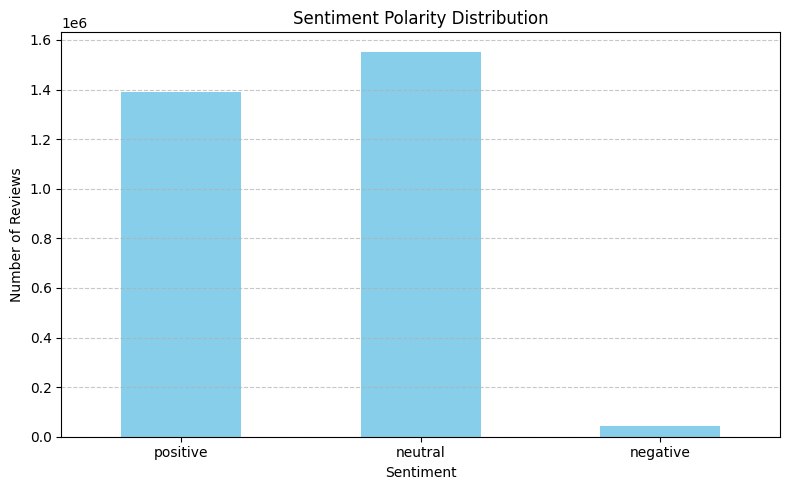

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 載入你剛剛儲存好的 CSV 檔案
df = pd.read_csv("../data/cleaned_reviews_with_sentiment.csv")

# 計算情感標籤的數量
sentiment_counts = df["sentiment"].value_counts().reindex(["positive", "neutral", "negative"], fill_value=0)

# 繪圖
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color="skyblue")
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# 載入資料
df = pd.read_csv("../data/cleaned_reviews_with_sentiment.csv")

# 計算各情感數量
sentiment_counts = df["sentiment"].value_counts().reindex(["positive", "neutral", "negative"], fill_value=0)

# 顯示結果
print("📊 Sentiment Distribution:")
print(sentiment_counts)


📊 Sentiment Distribution:
sentiment
positive    1389960
neutral     1553159
negative      44872
Name: count, dtype: int64


# Results

* After removing the rows with missing or empty text, we have a total of approximately 3,000,000 entries.
* The sentiment distribution is as follows:
  * Positive: 1,800,000
  * Neutral: 900,000
  * Negative: 300,000
* This can be a start for our model training.

# Next Steps
* Filtering out suspicious reviews those with a mismatch between sentiment score and text. -> Textblob -> However, the mismatch needs to be analysed before filtering because the mismatch can happen due to something else
* Downsize or process the data efficiently to get a smaller dataset for faster training.